<a href="https://colab.research.google.com/github/daniel-elesbao/BCC21DanielZamboni/blob/main/ProjetoBCCDanielZamboniElesb%C3%A3oeLuizHenriquedaSilva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projeto Final da Disciplina Bases Computacionais da Ciência Q3.2022 21h

Daniel Zamboni Elesbão - RA: 11202230222

Luiz Henrique da Silva - RA: 11202231412

Disciplina de base para o projeto: 

"Estado e Relações de Poder"

Fontes de dados oficiais do projeto:

https://www.transparency.org/en/cpi/2021

https://hdr.undp.org/data-center


In [ ]:
#Estudo estatístico comparativo entre o Índice de Desenvolvimento Humano (IDH ou HDR na sigla em inglês) das 
#Nações Unidas e o Índice de Percepção da Corrupção (CPI) da Transparência Internacional
#Projeto com inspiração na disciplina 'Estado e Relações de Poder'
import matplotlib.pyplot as plt #importa a biblioteca mathplotlib como plt
import pandas as pd #importa a biblioteca pandas como pd
hdr21 = pd.read_csv('https://raw.githubusercontent.com/daniel-elesbao/BasesComputacionais/master/HDR21-22_Composite_indices_complete_time_series.csv')
#Lê o CSV com o ranking do Índice de Desenvolvimento Humano das Nações Unidas de 2021
cpi21 = pd.read_excel('https://raw.githubusercontent.com/daniel-elesbao/BasesComputacionais/master/CPI2021_GlobalResults&Trends.xlsx')
#Lê planilha Excel com o índice de percepção de corrupção da transparência internacional de 2021
cpi21 = cpi21.drop(labels=[0,1], axis=0) #remove as duas primeiras linhas do DataFrame, sem dados relevantes
cpi21 = cpi21.rename(columns={'Unnamed: 1': 'ISO3','Unnamed: 3': 'CPI'}) #renomeia as colunas com as informações relevantes
descor = pd.merge(cpi21, hdr21, left_on='ISO3', right_on='iso3') #funde os Dataframes alinhando os dados dos países pela padronização do nome ISO3
descor = descor[['ISO3','CPI','iso3','hdi_rank_2021']] #remove todas as colunas exceto as que tem as informações relevantes para o escopo do projeto
descor = descor.dropna(axis = 0)#remove os valores vazios de países que por motivos políticos não tiveram os dados de HDI apurados.
descor['CPI'] = descor['CPI'].astype(float)#converte os valores da CPI para float, para poder realizar os cálculos

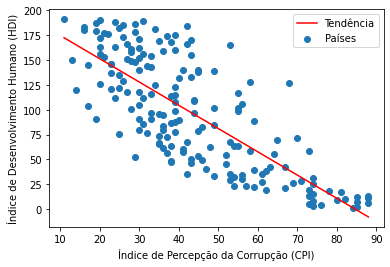


 A correlação entre o Índice de Percepção da Corrupção e o Índice de Desenvolvimento Humano é -0.772


In [ ]:
import pandas as pd #importa a biblioteca pandas como pd
import numpy as np #importa a biblioteca numpy como np
import matplotlib.pylab as plb #importa a biblioteca mathplotlib como plt

X = descor["CPI"] #Coluna CPI da tabela usada como coordenada X
Y = descor["hdi_rank_2021"] #Coluna hdi_rank da tabela usada como coordenada Y

media_X = np.mean(X) # média do X
media_Y = np.mean(Y) # média do Y
erro_x = X-media_X # Cálculo dos erros de X
erro_y = Y-media_Y # Cálculo dos erros de Y
soma_erro_xy = np.sum(erro_x*erro_y) # Somando o produto dos erros (faz parte da formula)
erro_x_quadratico = (X-media_X)**2.0 # Encontrando o x quadratico (faz parte da formula)
soma_erro_x_quadratico = np.sum(erro_x_quadratico) # Soma para ter o denominador completo (faz parte da formula)
m = soma_erro_xy / soma_erro_x_quadratico # formula anteriormente mencionada (coeficiente angular)
c = media_Y - m*media_X  # Formula para coeficiente linear
reta = m*X+c # Equação usando os coeficientes anteriormente calculados para chegar na reta
plt.scatter(X,Y,label='Países'); # Países separados por pontos no grafico 
plt.plot(X,reta,label='Tendência',color='red'); # Ajuste linear
plt.xlabel('Índice de Percepção da Corrupção (CPI)'); # Da um titulo ao X 
plt.ylabel('Índice de Desenvolvimento Humano (HDI)'); # Da um titulo ao Y 
plt.legend(); # Insere legenda no grafico
plt.show()
corr = descor['CPI'].corr(descor['hdi_rank_2021'])
print(f'\n A correlação entre o Índice de Percepção da Corrupção e o Índice de Desenvolvimento Humano é {corr:.3f}')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


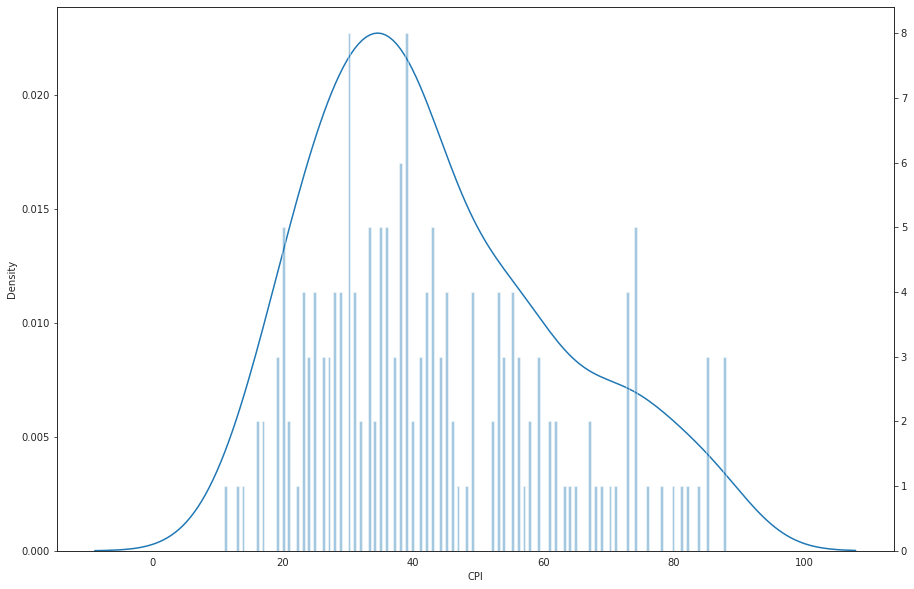

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

bins = 175 # Numero de colunas plotadas

sns.set_style("white") # Formatação do ambiente do gráfico 
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

g1 = sns.distplot(descor["CPI"], ax=ax,  # Insere curva KDE (Kernel Density Estimation)
                  kde=True, hist=False) 

ax_copy = ax.twinx() # Possibilita a formatação da segunda curva sem alteração da primeira
g2 = sns.distplot(descor["CPI"], ax=ax_copy, kde=False, hist=True, # Insere histograma
             bins=bins, norm_hist=False)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


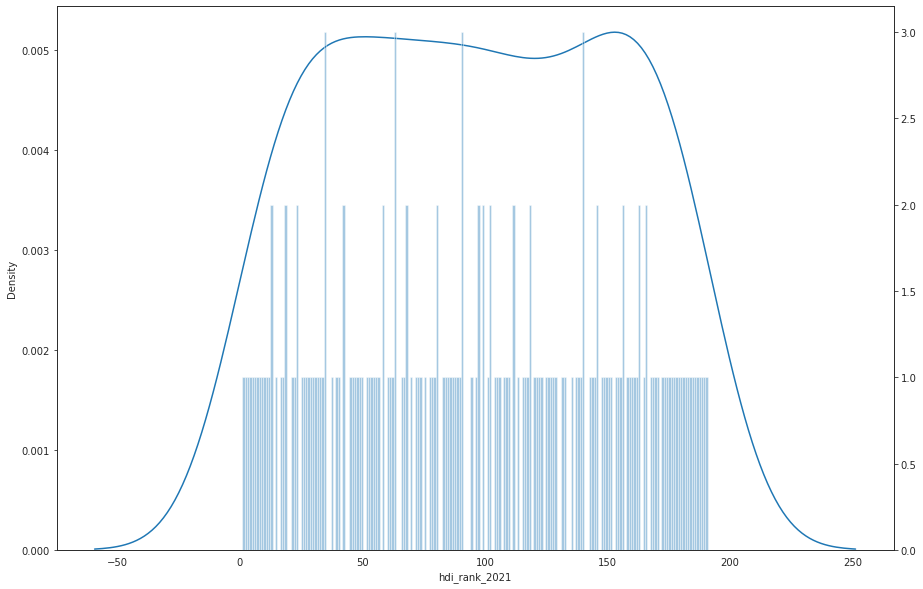

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

bins = 200

# Criando o ambiente do gráfico 
sns.set_style("white")
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Insere curva KDE (Kernel Density Estimation)
g1 = sns.distplot(descor["hdi_rank_2021"], ax=ax, 
                  kde=True, hist=False) 

# Insere histograma
ax_copy = ax.twinx()
g2 = sns.distplot(descor["hdi_rank_2021"], ax=ax_copy, kde=False, hist=True, 
             bins=bins, norm_hist=False)
